In [1]:
% run qpfs_class_draft.ipynb

In [2]:
from model_quality import *
from selector import *
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression

In [3]:
s = Selector(QPFS())
lin = PLSRegression()

In [4]:
q = ModelQuality(s, lin)

In [5]:
import scipy.stats as sps

XX = sps.norm.rvs(size=(100, 5))
X2 = sps.norm.rvs(size=(10, 5))
zz = sps.uniform.rvs(size=(5, 3))
yy = XX @ zz + sps.norm.rvs(scale=0.1, size=(100, 3))
y2 = X2 @ zz + sps.norm.rvs(scale=0.1, size=(10, 3))
maskk = np.ones(XX.shape[1])
maskk[2]=0
maskk[1] = 0
maskk[3] = 0
print(maskk)

metric1 = RSS()
metric2 = Adjusted_Determination_Coefficient()
metric3 = Determination_Coefficient()
metric4 = VIF()
metric5 = BIC()
char1 = Condition_Number()
comp1 = Cp()

[ 1.  0.  0.  0.  1.]


In [6]:
q.fit(XX, yy, ns_features = [3, 2, 4])

In [7]:
q.evaluate([metric1, metric2, metric3, metric4, metric5],
                           [comp1], [char1], mode='dynamic')

(70, 2) (70, 3)
(70, 3) (70, 3)
(70, 4) (70, 3)


In [8]:
q.evaluate_info.names

{'Adj Det Coef': 1,
 'BIC': 4,
 'Cond number': 6,
 'Det Coef': 2,
 "Mallow's Cp": 5,
 'RSS': 0,
 'VIF': 3}

In [9]:
q.mean.shape

(7, 3)

In [10]:
q.result.shape

(7, 3, 20)

In [11]:
q.std.shape

(7, 3)

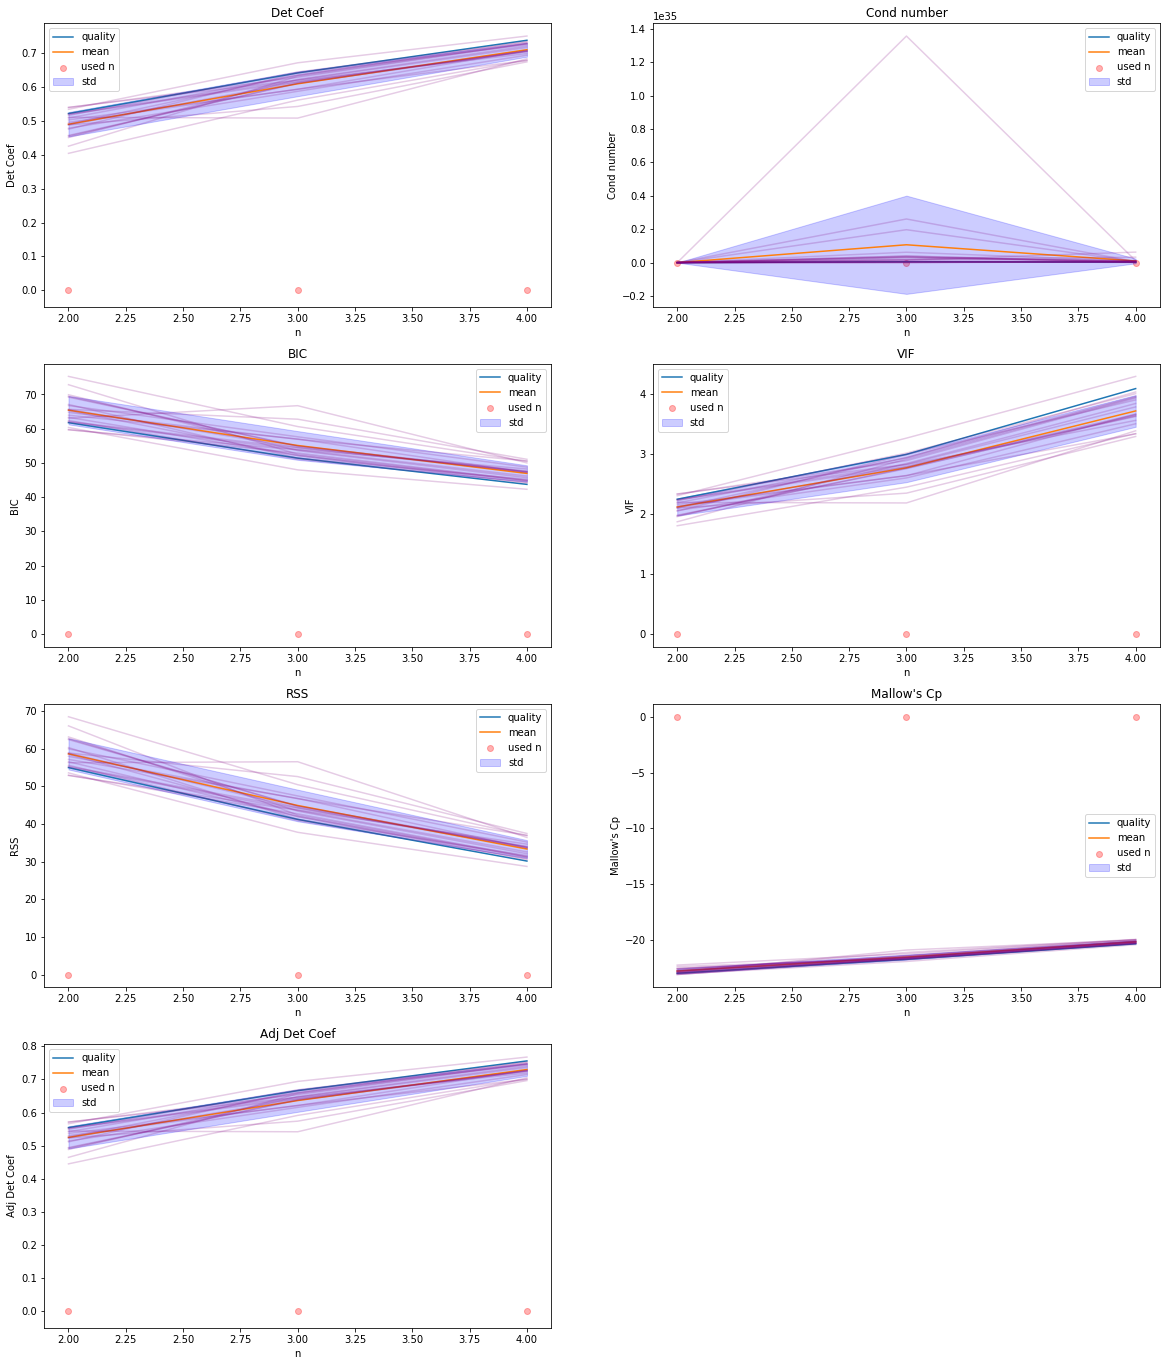

In [12]:
q.draw()

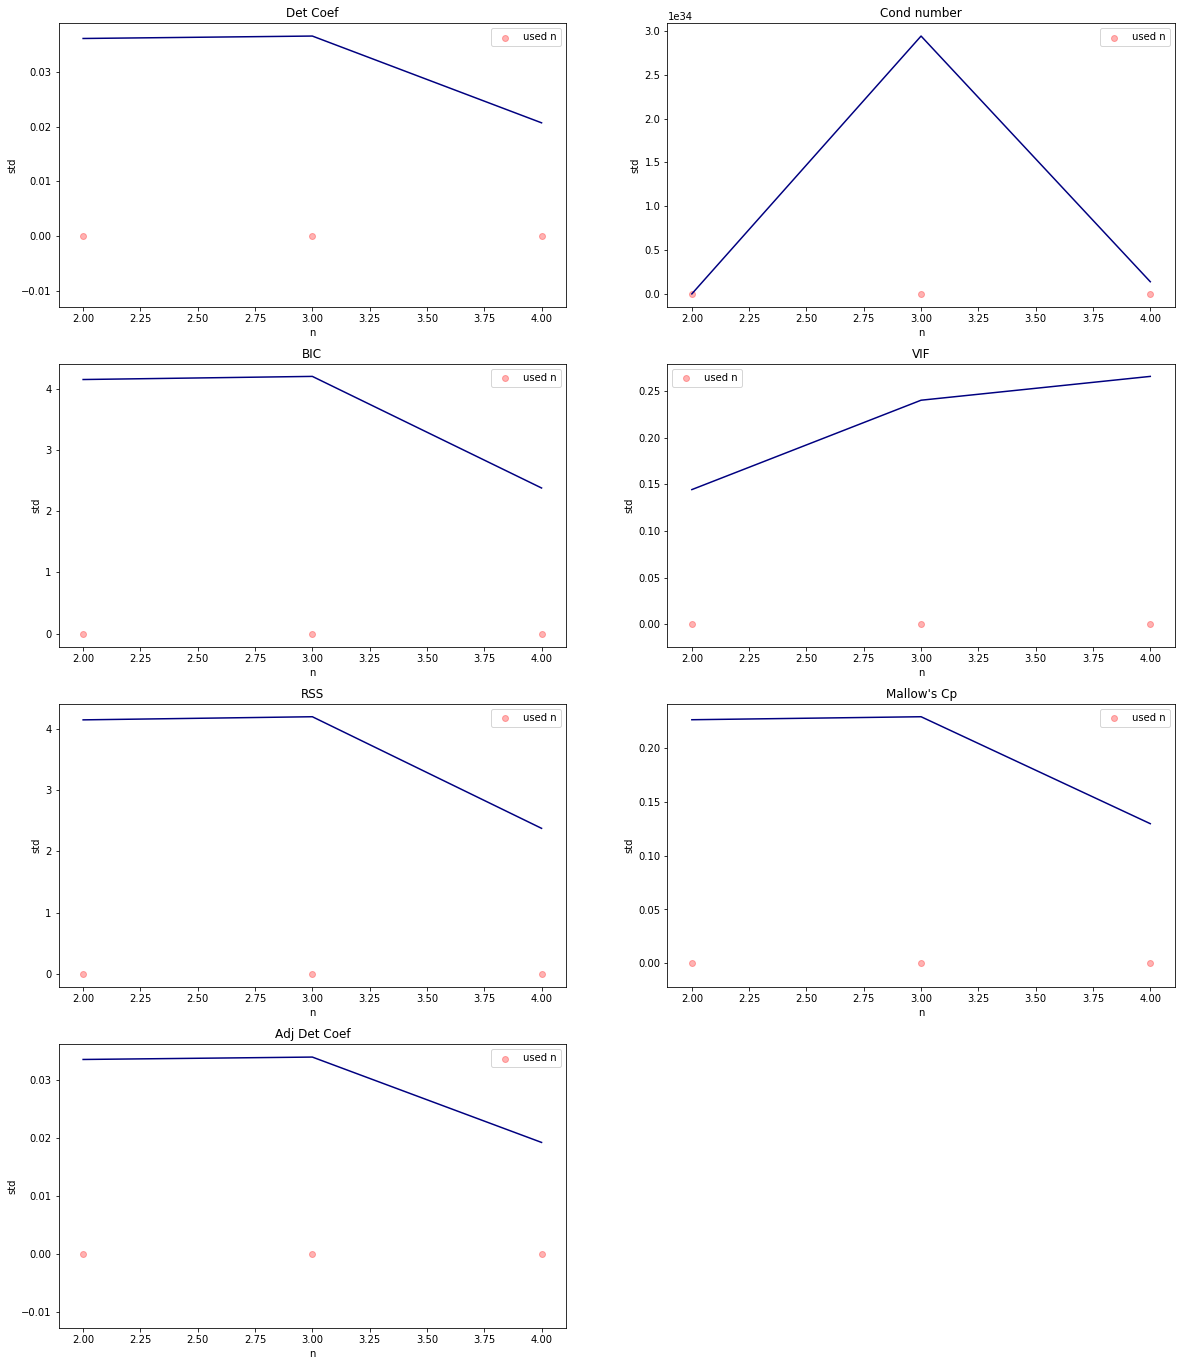

In [13]:
q.draw_std()#['Adj Det Coef','BIC', 'Det Coef', "Mallow's Cp",'RSS', 'VIF', 'Cond number'])

In [14]:
a, b, c = q.check_normality(pandas=True, return_original_p=True, alpha=0.1)

In [15]:
a

,Det Coef,Cond number,BIC,VIF,RSS,Mallow's Cp,Adj Det Coef
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True
4,False,False,False,False,False,False,True


In [16]:
b

,Det Coef,Cond number,BIC,VIF,RSS,Mallow's Cp,Adj Det Coef
2,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,6.471604e-01
3,0.351647,0.351647,0.351647,1.0,0.351647,0.351647,8.138683e-10
4,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,3.431147e-07


In [17]:
c

,Det Coef,Cond number,BIC,VIF,RSS,Mallow's Cp,Adj Det Coef
2,0.332193,0.332193,0.332193,0.672927,0.332193,0.332193,4.622574e-02
3,0.018508,0.018508,0.018508,0.240400,0.018508,0.018508,3.875564e-11
4,0.709232,0.709232,0.709232,0.855320,0.709232,0.709232,1.715573e-08


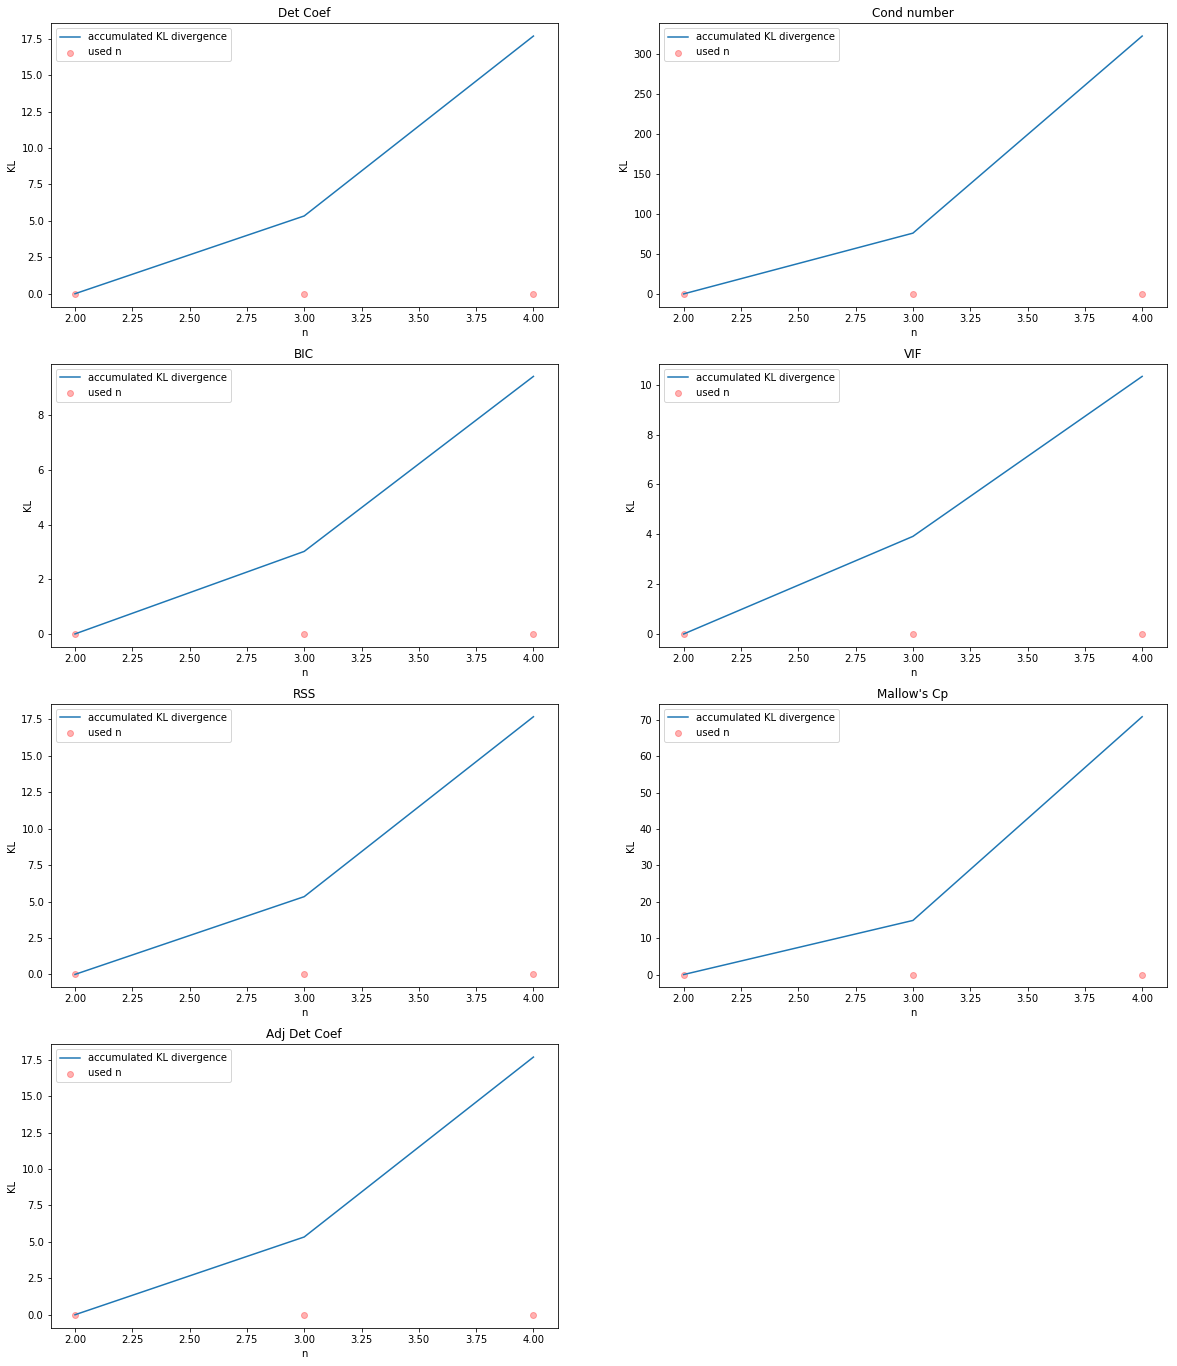

In [18]:
q.draw_KL()

In [19]:
q.summary()

Det Coef :
Min metric test value: 0.521660237106 with n = 0
Max metric test value: 0.737690315813 with n = 2
Min metric average value 0.489865197486 with n = 0
Max metric average value 0.709909901521 with n = 2
Min metric std 0.0206831247095 with n = 2
Max metric std 0.0365393749069 with n = 1
Min metric mean-std 0.453770368058 with n = 0
Max metric mean+std 0.730593026231 with n = 2
Min metric relative std 0.0291348587549 with n = 2
Max metric relative std 0.0736831879729 with n = 0

Cond number :
Min metric test value: 28.9590416368 with n = 0
Max metric test value: 5.18502918935e+32 with n = 1
Min metric average value 35.8406133625 with n = 0
Max metric average value 1.06906592922e+34 with n = 1
Min metric std 22.2487433189 with n = 0
Max metric std 2.94270120165e+34 with n = 1
Min metric mean-std -1.87363527243e+34 with n = 1
Max metric mean+std 4.01176713086e+34 with n = 1
Min metric relative std 0.620769044711 with n = 0
Max metric relative std 2.75259094994 with n = 1

BIC :
Min